<a href="https://colab.research.google.com/github/Rama-Pathak/Codsoft/blob/main/Credit_Card_defection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# import the dataset
credit=pd.read_csv('creditcard.csv')
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,6634,-1.611463,0.190648,0.901715,1.531254,-1.535865,0.799245,1.513786,0.495829,0.200390,...,0.211223,0.007477,1.026272,0.057628,-0.024955,-0.368263,0.081684,0.140669,458.92,0.0
5970,6635,-1.420272,1.449354,1.320110,-1.894320,0.913695,0.454601,0.894179,-0.385450,2.433841,...,-0.529027,-0.368394,-0.247773,-1.189156,-0.126040,0.701487,0.277333,-0.222694,0.77,0.0
5971,6637,-1.206696,0.284728,2.152053,-2.850437,-0.437285,-0.238376,-0.333341,0.334679,2.870542,...,0.039460,0.464476,-0.457193,-0.556105,0.517579,0.008006,0.366054,0.185008,14.00,0.0
5972,6644,1.067611,0.091006,-0.153917,0.704233,0.113894,-0.826866,0.567690,-0.464181,0.957295,...,-0.476723,-1.410090,-0.037550,-0.177773,0.321810,0.114930,-0.109640,0.023205,139.90,0.0


In [ ]:
# Information of the data
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [ ]:
# Display summary statistics of the dataframe
print(credit.describe())

              Time           V1           V2           V3           V4  \
count  5974.000000  5974.000000  5974.000000  5974.000000  5974.000000   
mean   2677.615501    -0.266159     0.285505     0.844231     0.104200   
std    1765.025532     1.395405     1.208867     1.031448     1.442339   
min       0.000000   -12.168192   -15.732974   -12.389545    -4.657545   
25%    1162.250000    -1.015749    -0.280054     0.295701    -0.839417   
50%    2537.000000    -0.420703     0.346083     0.882882     0.161767   
75%    3781.750000     1.115402     0.941548     1.504158     1.071412   
max    6645.000000     1.685314     7.467017     4.101716     6.013346   

                V5           V6           V7           V8           V9  ...  \
count  5974.000000  5974.000000  5974.000000  5974.000000  5974.000000  ...   
mean      0.000709     0.194948     0.018324    -0.039006     0.396916  ...   
std       1.185900     1.365525     1.059870     1.304005     1.047749  ...   
min     -32.09212

In [ ]:
# Calculate the null values
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# Fill missing 'Age' values with mean
credit['Amount'].fillna(credit['Amount'].mean(), inplace=True)
credit['Class'].fillna(credit['Class'].mean(), inplace=True)

In [ ]:
# Count the number of instances for each class
print(credit['Class'].value_counts())

Class
0.0    5970
1.0       3
Name: count, dtype: int64


In [ ]:
# dropping the unnecessary columns
credit = credit.dropna(subset=['V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28',]).reset_index(drop=True)

In [ ]:
# Step 3: Separate normal and fraud transactions
normal = credit[credit['Class'] == 0]
fraud = credit[credit['Class'] == 1]


In [ ]:
# Display shapes of normal and fraud transactions
print(normal.shape)
print(fraud.shape)

(5970, 31)
(3, 31)


In [ ]:
# Display descriptive statistics of transaction amounts for normal and fraud
print(normal['Amount'].describe())
print(fraud['Amount'].describe())

count    5970.000000
mean       64.965707
std       192.429839
min         0.000000
25%         4.450000
50%        15.620000
75%        56.485000
max      7712.430000
Name: Amount, dtype: float64
count      3.000000
mean     256.310000
std      264.880121
min        0.000000
25%      119.965000
50%      239.930000
75%      384.465000
max      529.000000
Name: Amount, dtype: float64


In [ ]:
# correlation matrix
corrr=credit.corr()
corrr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.000342,0.023746,0.026582,0.064736,0.042063,0.092129,-0.105662,0.017911,0.427311,...,-0.068461,-0.071659,0.035577,-0.002316,-0.035713,-0.084701,-0.055814,0.028557,-0.002898,-0.011397
V1,-0.000342,1.000000,-0.204279,-0.195216,0.089037,-0.098496,0.018034,-0.113453,0.216416,-0.120318,...,-0.126873,-0.083443,-0.131718,0.016486,0.300709,-0.070399,-0.057779,-0.003473,-0.168783,-0.036739
V2,0.023746,-0.204279,1.000000,0.023997,0.039262,0.064826,-0.070514,0.132836,-0.191543,0.026146,...,0.062378,-0.050443,0.060974,-0.028185,-0.167491,-0.030538,0.135955,-0.077480,-0.501780,-0.001872
V3,0.026582,-0.195216,0.023997,1.000000,0.205217,-0.097120,-0.238196,0.031716,0.031939,0.058275,...,0.021769,0.294036,-0.022193,-0.052483,-0.289372,0.112200,-0.123658,-0.130909,-0.217583,-0.024730
V4,0.064736,0.089037,0.039262,0.205217,1.000000,-0.145836,0.003941,-0.009397,0.036502,-0.101877,...,-0.029604,0.024582,0.037749,-0.069135,-0.034917,0.148310,-0.085996,0.027379,0.104263,0.043025
V5,0.042063,-0.098496,0.064826,-0.097120,-0.145836,1.000000,0.197434,-0.165035,0.121169,-0.000477,...,0.008717,-0.109561,-0.021618,0.043068,0.004707,-0.179090,-0.059757,-0.143292,-0.469003,0.000083
V6,0.092129,0.018034,-0.070514,-0.238196,0.003941,0.197434,1.000000,-0.109082,0.020028,0.029526,...,0.029919,-0.088041,0.012081,0.076126,0.106824,0.009276,-0.007499,0.017214,0.226341,-0.017247
V7,-0.105662,-0.113453,0.132836,0.031716,-0.009397,-0.165035,-0.109082,1.000000,0.185354,-0.031242,...,-0.086301,0.098814,-0.135394,-0.023114,-0.123470,-0.059713,-0.023307,-0.049765,0.399913,-0.012015
V8,0.017911,0.216416,-0.191543,0.031939,0.036502,0.121169,0.020028,0.185354,1.000000,-0.043407,...,-0.228870,0.069905,-0.138708,0.010740,0.039193,0.014418,0.037304,0.037416,-0.070748,0.005970
V9,0.427311,-0.120318,0.026146,0.058275,-0.101877,-0.000477,0.029526,-0.031242,-0.043407,1.000000,...,0.018006,0.012955,-0.046555,-0.015701,0.110435,-0.010279,-0.020579,-0.072700,-0.025171,-0.031878


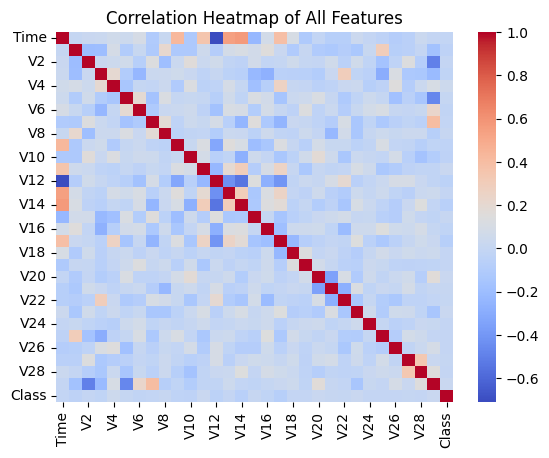

In [ ]:
# visulaizing the heatmap
sns.heatmap(corrr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of All Features')
plt.show()

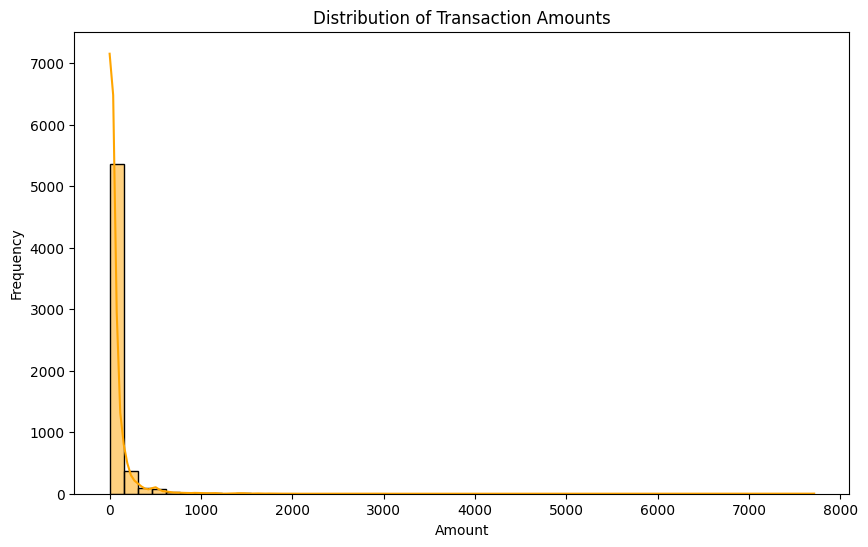

In [ ]:
# Plot 1: Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(credit['Amount'], bins=50, kde=True, color='orange')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

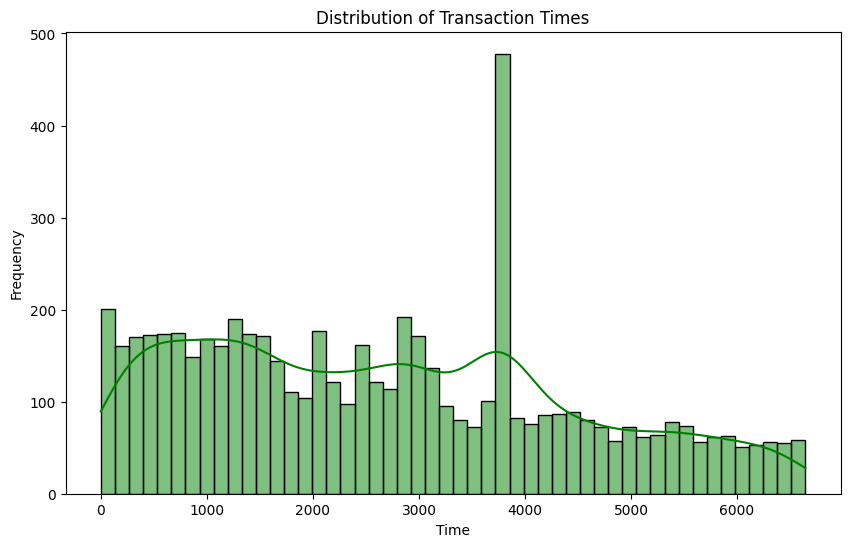

In [ ]:
# Plot 2: Distribution of transaction times
plt.figure(figsize=(10, 6))
sns.histplot(credit['Time'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Times')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


<ipython-input-18-d0653d4bc558>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=credit, palette='viridis')


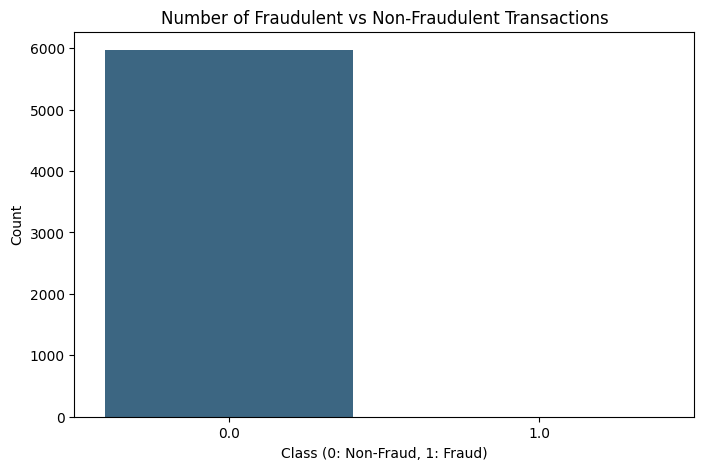

In [ ]:
# Plot 3: Number of fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=credit, palette='viridis')
plt.title('Number of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Step 5: Prepare data for modeling
X = credit.drop(columns='Class', axis=1)
Y = credit['Class']


In [ ]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
# Step 6: Initialize and train the model
model = LinearRegression()  # Increase max_iter for convergence
model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# check the final null values
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate mean squared error and R^2 score
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.00037954485257213984
R^2 Score: 0.0


In [ ]:
# Step 6: Initialize and train the model
model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Step 7: Evaluate model performance
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) * 100
print(f"Training Data Accuracy: {training_data_accuracy:.2f}%")

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) * 100
print(f"Test Data Accuracy: {test_data_accuracy:.2f}%")


Training Data Accuracy: 99.98%
Test Data Accuracy: 99.92%


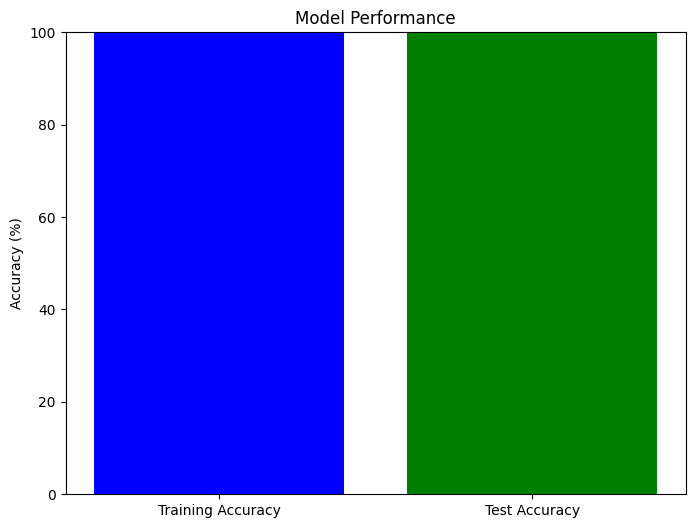

In [ ]:
# Visualization
labels = ['Training Accuracy', 'Test Accuracy']
accuracies = [training_data_accuracy, test_data_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy (%)')
plt.title('Model Performance')
plt.ylim(0, 100)
plt.show()

In [ ]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(Y_test, X_test_prediction))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1195
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00      1195
   macro avg       0.50      0.50      0.50      1195
weighted avg       1.00      1.00      1.00      1195

Confusion Matrix:
[[1194    1]
 [   0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


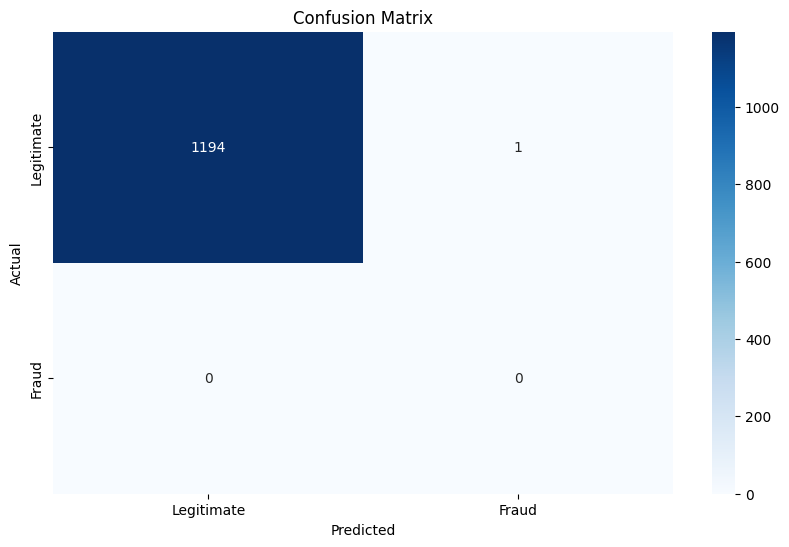

In [ ]:
# Visualization of confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predict on training data and calculate accuracy
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction) * 100


In [ ]:
# Predict on testing data and calculate accuracy
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction) * 100

In [ ]:
# Print accuracies
print(f"Training Data Accuracy: {training_data_accuracy:.2f}%")
print(f"Test Data Accuracy: {test_data_accuracy:.2f}%")

Training Data Accuracy: 100.00%
Test Data Accuracy: 100.00%


In [ ]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(Y_test, X_test_prediction))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1195

    accuracy                           1.00      1195
   macro avg       1.00      1.00      1.00      1195
weighted avg       1.00      1.00      1.00      1195

Confusion Matrix:
[[1195]]


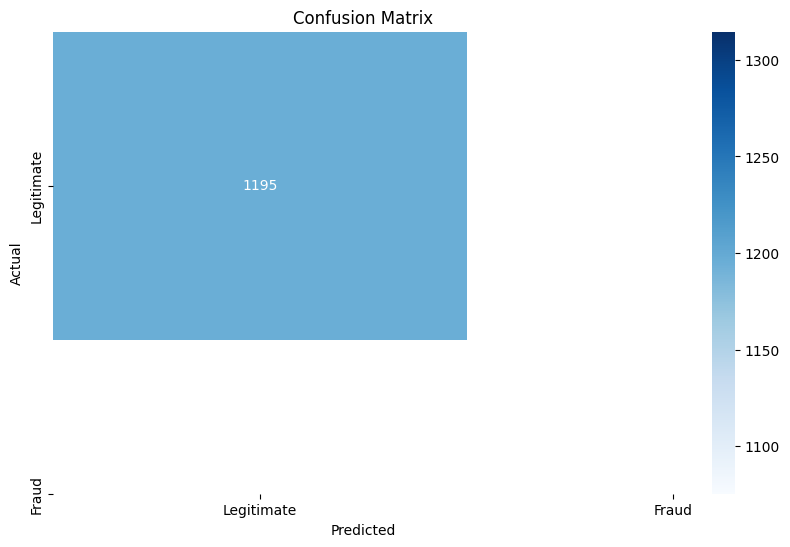

In [ ]:
# Visualization of confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()